In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def stat_analysis(sample, sample_rw):
    print("Mean is {}".format(np.mean(sample)))
    print("Median is {}".format(np.median(sample)))
    print("Min is {}".format(np.min(sample)))
    print("Max is {}".format(np.max(sample)))
    print("Standard deviation is {:.2e}".format(np.var(sample)**0.5))
    print("Iqr is {}".format(stats.iqr(sample)))
    mode_result = stats.mode(np.round(sample, 2))
    print("Mode is {} with count {}".format(*mode_result[0], *mode_result[1]))
    print("Skew is {:.2e}".format(stats.skew(sample)))
    print("Kurtosis is {:.2e}".format(stats.kurtosis(sample)))

    
    yhist, xhist, _hist = plt.hist(sample, bins=11)

    
    plt.hist(sample, bins=11)
    plt.show()
    plt.boxplot(sample)
    plt.show()
    stats.probplot(sample, plot=plt)
    plt.show()
    
    min_sample = np.min(sample)
    max_sample = np.max(sample)
    h = (max_sample - min_sample) / 10
    teoretical_hist = np.array([
        1000 * (sample_rw.cdf(x + h) - sample_rw.cdf(x))
            for x in np.arange(min_sample, max_sample, h)
    ])

    print(stats.kstest(sample, cdf = sample_rw.cdf))
    print(f'Chi-squared test: {stats.chisquare(np.histogram(sample, bins=10)[0], teoretical_hist)}')
    

Mean is 0.03693153301529935
Median is 0.023852453453138366
Min is -3.341260548733453
Max is 3.61631614597746
Standard deviation is 1.02e+00
Iqr is 1.3741545790518728
Mode is -0.61 with count 8
Skew is 5.42e-02
Kurtosis is 8.31e-02


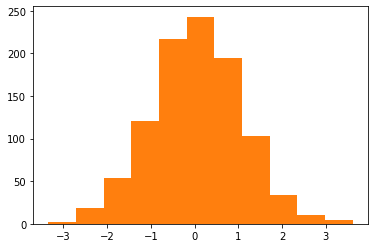

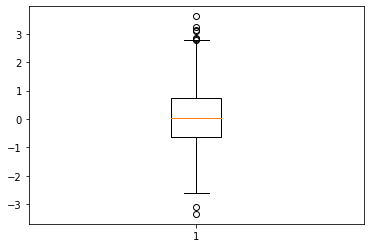

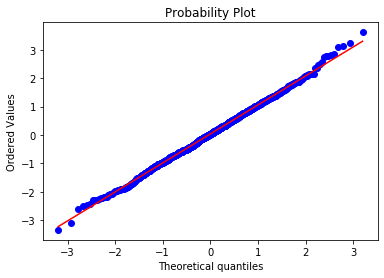

KstestResult(statistic=0.0221547049601013, pvalue=0.7102473074991404)
Chi-squared test: Power_divergenceResult(statistic=6.633885965654798, pvalue=0.6751767401907252)


In [2]:
'Normal (0, 1)'
norm_rw = stats.norm(loc = 0, scale = 1)
sample = norm_rw.rvs(1000)
stat_analysis(sample, norm_rw)


Mean is 1.5345664768116303
Median is 1.2074035119849273
Min is 7.972397676163937
Max is 0.5065136824974402
Standard deviation is 1.02e+00
Iqr is 1.1176023870387506
Mode is 0.71 with count 15
Skew is 1.67e+00
Kurtosis is 3.37e+00


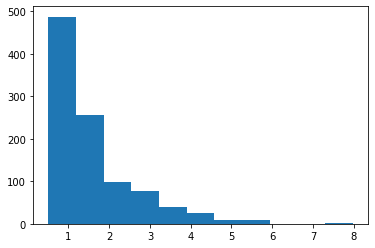

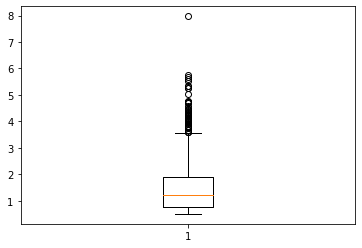

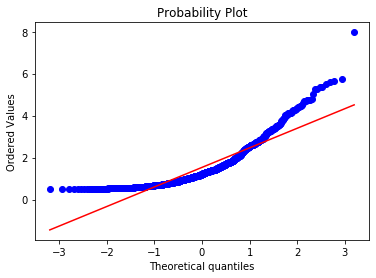

KstestResult(statistic=0.03176630807502401, pvalue=0.2602180747107155)
Chi-squared test: Power_divergenceResult(statistic=8.323580808409094, pvalue=0.5018945383447992)


In [43]:
'Weibull (1, 0.5) = Exponential(0.5)'
exponential_rw = stats.expon(0.5)
sample = exponential_rw.rvs(1000)
stat_analysis(sample, exponential_rw)

Mean is 0.0639942072666388
Median is 0.08575909571683166
Min is 3.543496668908018
Max is -3.117811716868058
Standard deviation is 1.00e+00
Iqr is 1.3395695686002875
Mode is -0.3 with count 9
Skew is 2.27e-02
Kurtosis is 5.45e-02


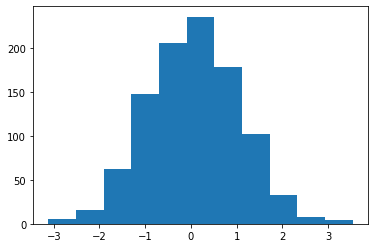

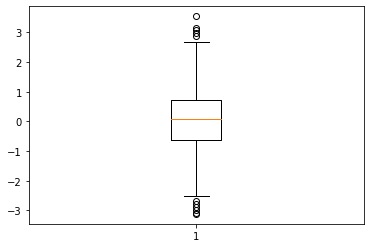

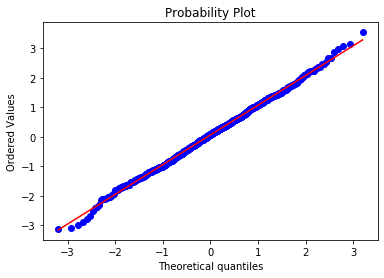

KstestResult(statistic=0.03709041665077817, pvalue=0.12452915348070681)
Chi-squared test: Power_divergenceResult(statistic=10.933411153005398, pvalue=0.2803009098924029)


In [52]:
'Normal (0, 1) with 5% Exponential(0.5) noise'
exponential_rw = stats.expon(0.5)
norm_rw = stats.norm(loc = 0, scale = 1)

exponential_sample = exponential_rw.rvs(50)
norm_sample = norm_rw.rvs(950)

noisy_sample = np.append(norm_sample, exponential_sample)
stat_analysis(noisy_sample, norm_rw)